##### California Housing Dataset
###### Regression Task

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# California Housing dataset
housing_data = pd.read_csv("C:\\Users\\NAOMI NADDYB\\Desktop\\DATA\\housing_coursework_entire_dataset_23-24_2.csv")
housing_data.head()


,No.,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,1,-122.12,37.70,17,2488,617.0,1287,538,2.9922,179900,NEAR BAY
1,2,-122.21,38.10,36,3018,557.0,1445,556,3.8029,129900,NEAR BAY
2,3,-122.22,38.11,43,1939,353.0,968,392,3.1848,112700,NEAR BAY
3,4,-122.20,37.78,52,2300,443.0,1225,423,3.5398,158400,NEAR BAY
4,5,-122.19,37.79,50,954,217.0,546,201,2.6667,172800,NEAR BAY


In [ ]:
print("This dataset has {} houses and {} features.".format(housing_data.shape[0], housing_data.shape[1]))


This dataset has 1000 houses and 11 features.


In [ ]:
# Checking missing values
print("There are missing values:\n{}".format(housing_data.isna().sum()))


There are missing values:
No.                   0
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        9
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       2
dtype: int64


In [ ]:
# Handling missing values
housing_data['total_bedrooms'].fillna(housing_data['total_bedrooms'].median(), inplace=True)


In [ ]:
housing_data['ocean_proximity'].value_counts()


ocean_proximity
<1H OCEAN     456
INLAND        336
NEAR OCEAN    115
NEAR BAY       91
Name: count, dtype: int64

In [ ]:
housing_data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   No.                 1000 non-null   int64  
 1   longitude           1000 non-null   float64
 2   latitude            1000 non-null   float64
 3   housing_median_age  1000 non-null   int64  
 4   total_rooms         1000 non-null   int64  
 5   total_bedrooms      1000 non-null   float64
 6   population          1000 non-null   int64  
 7   households          1000 non-null   int64  
 8   median_income       1000 non-null   float64
 9   median_house_value  1000 non-null   int64  
 10  ocean_proximity     998 non-null    object 
dtypes: float64(4), int64(6), object(1)
memory usage: 86.1+ KB


In [ ]:
housing_data.describe()


,No.,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,-119.508740,35.604810,27.62500,2736.217000,556.299000,1471.59000,515.909000,3.955882,207767.443000
std,288.819436,1.960951,2.139722,12.27253,2179.854484,424.300429,1123.21073,384.781423,1.940355,113675.832278
min,1.000000,-124.190000,32.560000,2.00000,19.000000,11.000000,34.00000,9.000000,0.536000,14999.000000
25%,250.750000,-121.520000,33.910000,17.75000,1484.500000,304.500000,805.75000,287.750000,2.625000,119900.000000
50%,500.500000,-118.480000,34.255000,27.50000,2214.000000,449.000000,1199.50000,426.500000,3.692600,184350.000000
75%,750.250000,-118.030000,37.700000,36.00000,3260.000000,667.000000,1803.75000,626.000000,4.856800,261950.000000
max,1000.000000,-115.410000,41.780000,52.00000,27700.000000,4386.000000,15037.00000,4072.000000,15.000100,500001.000000


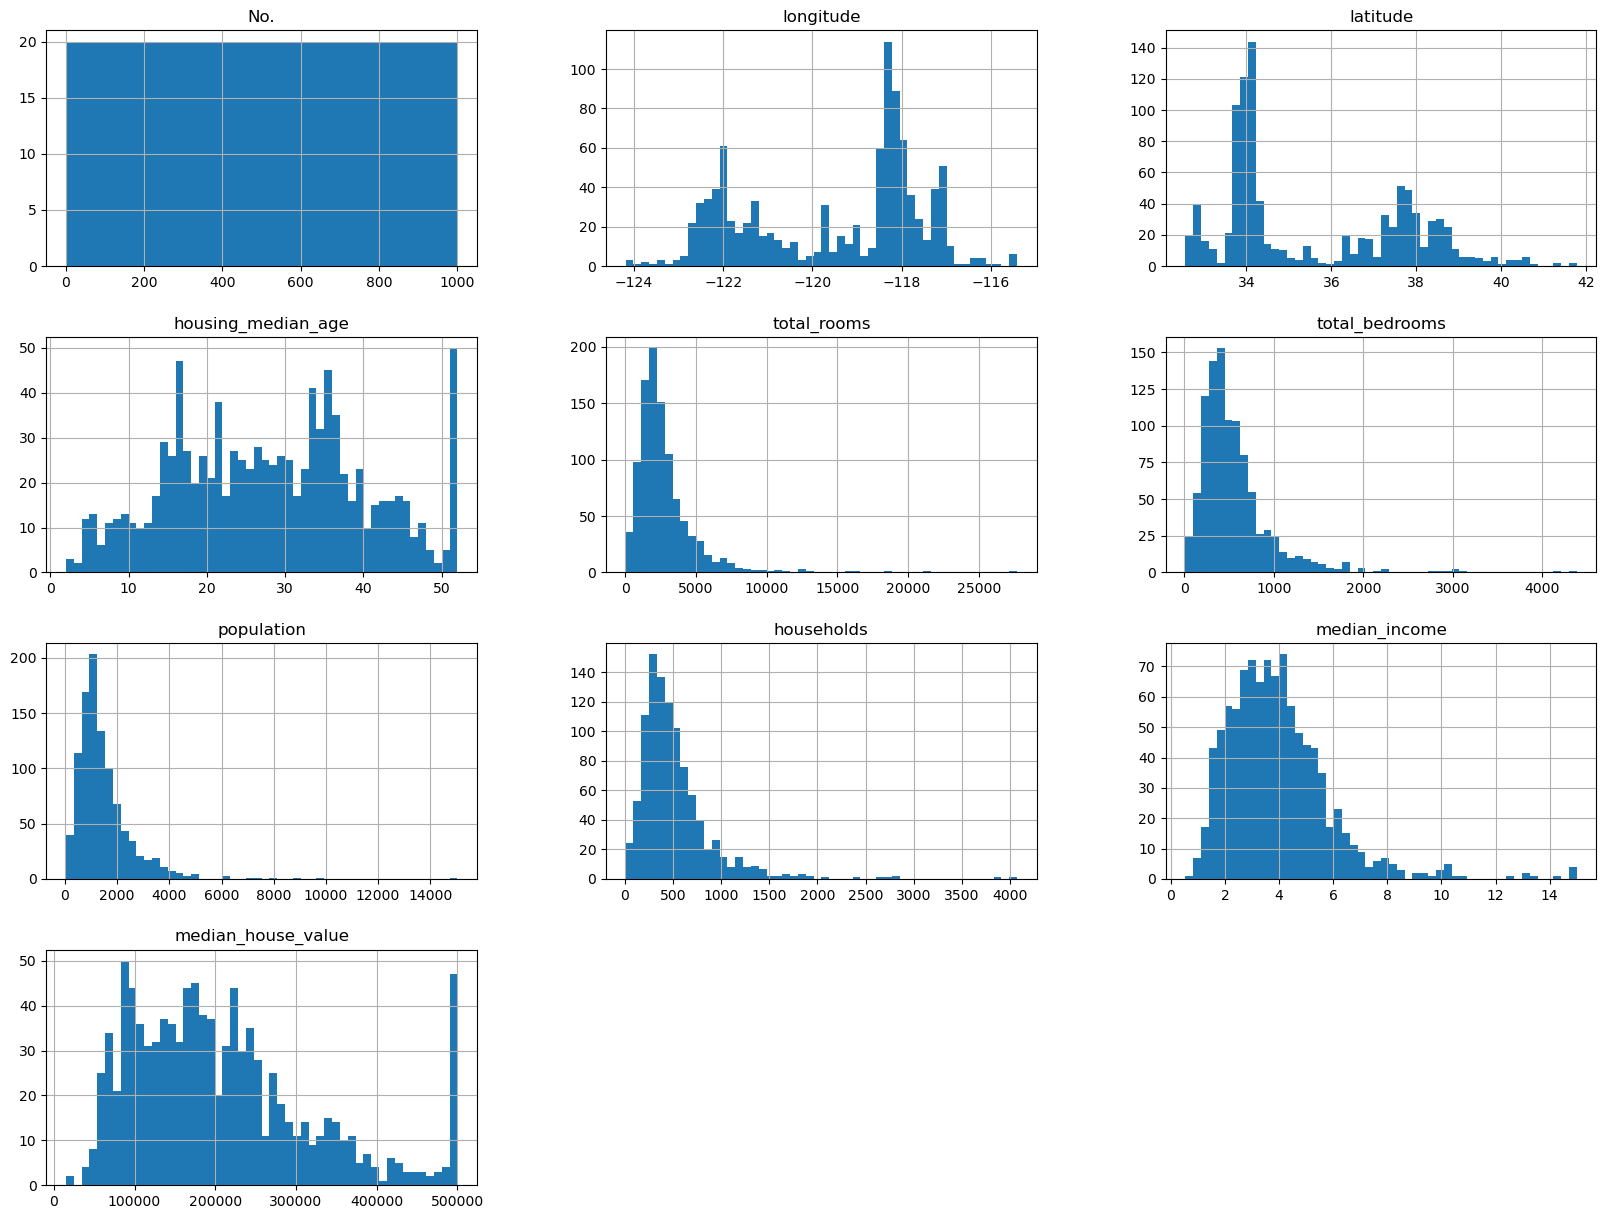

In [ ]:
# visualizing the Data
housing_data.hist(bins=50, figsize=(20, 15))
plt.show()

#### PREPARING AND SPLITTING DATA

In [ ]:
housing_data['ocean_proximity'] = housing_data['ocean_proximity'].astype('category').cat.codes


# Splitting the data into features and target

X = housing_data.drop(columns=['median_house_value'])
y = housing_data['median_house_value']

In [ ]:
# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X[:800], y[:800], test_size=200, random_state=42)


In [ ]:
X.head()

,No.,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,1,-122.12,37.70,17,2488,617.0,1287,538,2.9922,2
1,2,-122.21,38.10,36,3018,557.0,1445,556,3.8029,2
2,3,-122.22,38.11,43,1939,353.0,968,392,3.1848,2
3,4,-122.20,37.78,52,2300,443.0,1225,423,3.5398,2
4,5,-122.19,37.79,50,954,217.0,546,201,2.6667,2


In [ ]:
print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))

X_train shape (600, 10) and size 6000
X_test shape (200, 10) and size 2000
y_train shape (600,) and size 600
y_test shape (200,) and size 200


#### CREATING and EVALUATING the MODEL

In [ ]:
# Defining and training Decision Tree Regression model
decision_tree_model = DecisionTreeRegressor(random_state=101)
decision_tree_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = decision_tree_model.predict(X_test)

# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = decision_tree_model.score(X_test, y_test)

# Printing the evaluation metrics
print("Mean squared error: %.2f" % mse)
print("Mean absolute error: %.2f" % mae)
print("Root mean squared error: %.2f" % rmse)
print('Test variance score (R^2): %.2f' % r2)
print("Model Score for Training data: %.2f" % decision_tree_model.score(X_train, y_train))
print("Model Score for Testing data: %.2f" % r2)

# Calculating and printing R2 score using cross-validation
r2_cv = np.sqrt(cross_val_score(decision_tree_model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)).mean()
print('R2 score using cross-validation: %.2f' % r2_cv)


Mean squared error: 9484073835.03
Mean absolute error: 64163.04
Root mean squared error: 97386.21
Test variance score (R^2): 0.25
Model Score for Training data: 1.00
Model Score for Testing data: 0.25
R2 score using cross-validation: 0.52


In [ ]:
# Function to plot validation curve
def plot_validation_curve(scores, param_range, param_name, scoring='r2'):
    """This function plots the validation curve.

    Parameters:
        scores: scores obtained from validation_curve() method
        param_range: list of range of parameters passed as 'param_range' in validation_curve() method
        param_name: name of the parameter varied in the validation curve
        scoring: str, default='r2', scoring method used for evaluation
    """
    n = len(param_range)
    if scoring == 'r2':
        train_score = [scores[0][i].mean() for i in range(n)]
        test_score = [scores[1][i].mean() for i in range(n)]
    elif scoring == 'neg_mean_squared_error':
        train_score = [np.sqrt(-scores[0][i].mean()) for i in range(n)]
        test_score = [np.sqrt(-scores[1][i].mean()) for i in range(n)]

    fig = plt.figure(figsize=(8, 6))
    plt.plot(param_range, train_score, label='Train')
    plt.plot(param_range, test_score, label='Test')
    plt.xticks(param_range)
    plt.title("Validation curve of {}".format(param_name), size=12)
    plt.xlabel(param_name)
    plt.ylabel('Score')
    plt.legend()
    plt.show()



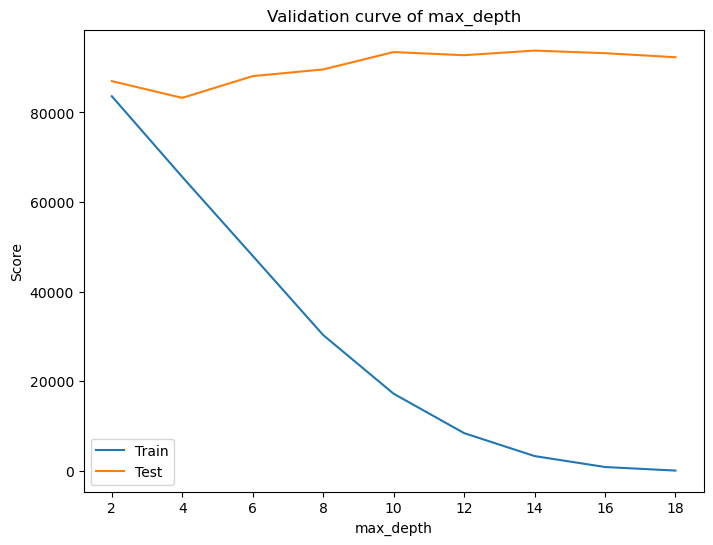

In [ ]:
# Define ranges for hyperparameters
param_range_max_depth = range(2, 20, 2)
param_range_max_features = range(2, 11)
param_range_min_samples_split = range(2, 1000, 100)
param_range_min_samples_leaf = range(1, 701, 100)

# Max Depth
curve_max_depth = validation_curve(decision_tree_model, X_train, y_train, param_name='max_depth',
                                    param_range=param_range_max_depth, cv=5,
                                    scoring='neg_mean_squared_error', n_jobs=-1)
plot_validation_curve(curve_max_depth, param_range_max_depth, 'max_depth', scoring='neg_mean_squared_error')




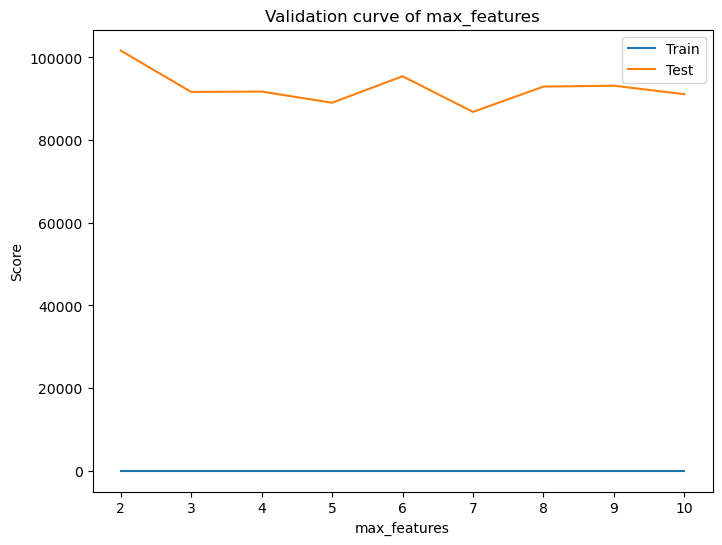

In [ ]:
# Max Features
curve_max_features = validation_curve(decision_tree_model, X_train, y_train, param_name='max_features',
                                      param_range=param_range_max_features, cv=5,
                                      scoring='neg_mean_squared_error', n_jobs=-1)
plot_validation_curve(curve_max_features, param_range_max_features, 'max_features', scoring='neg_mean_squared_error')



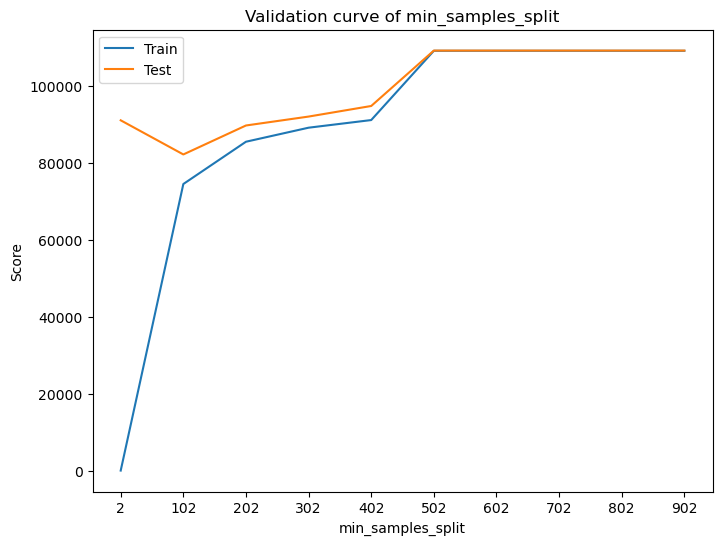

In [ ]:
# Min Samples Split
curve_min_samples_split = validation_curve(decision_tree_model, X_train, y_train, param_name='min_samples_split',
                                            param_range=param_range_min_samples_split, cv=5,
                                            scoring='neg_mean_squared_error', n_jobs=-1)
plot_validation_curve(curve_min_samples_split, param_range_min_samples_split, 'min_samples_split',
                      scoring='neg_mean_squared_error')



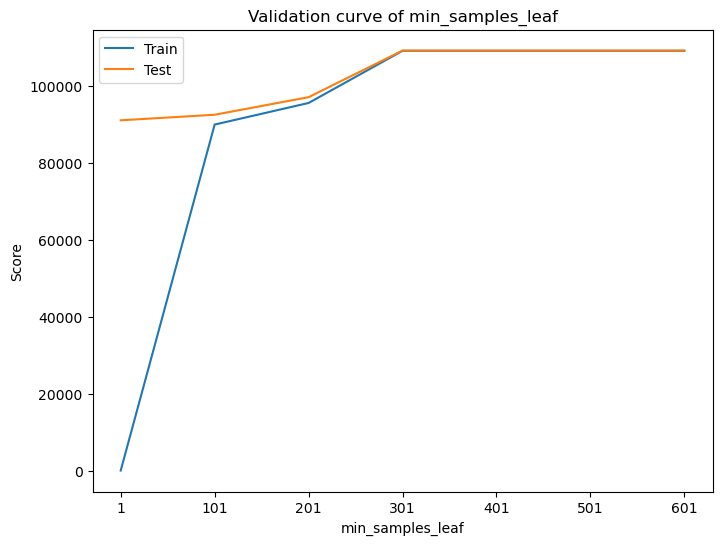

In [ ]:
# Min Samples Leaf
curve_min_samples_leaf = validation_curve(decision_tree_model, X_train, y_train, param_name='min_samples_leaf',
                                           param_range=param_range_min_samples_leaf, cv=5,
                                           scoring='neg_mean_squared_error', n_jobs=-1)
plot_validation_curve(curve_min_samples_leaf, param_range_min_samples_leaf, 'min_samples_leaf',
                      scoring='neg_mean_squared_error')

#### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=160, min_samples_leaf=3, n_jobs=-1, random_state=11)

# Training the model
forest_reg.fit(X_train, y_train)

# Making predictions
housing_predictions = forest_reg.predict(X_test)

# Calculating mean squared error
forest_mse = mean_squared_error(y_test, housing_predictions)

# Calculating root mean squared error
forest_rmse = np.sqrt(forest_mse)
print("Root Mean Squared Error:", forest_rmse)
print("\n")

# Random Forest Regressor with Cross Validation
forest_scores = cross_val_score(forest_reg, X_train, y_train,
                                 scoring="neg_mean_squared_error", cv=10)
forest_scores_rmse = np.sqrt(-forest_scores)

# Displaying scores
print("Cross Validation Scores:")
print(forest_scores_rmse)
print("Mean:", forest_scores_rmse.mean())
print("Standard deviation:", forest_scores_rmse.std())


Root Mean Squared Error: 67764.70515525276


Cross Validation Scores:
[42755.89114384 48900.12546745 63279.37103529 62728.52397732
 60712.68533465 90056.60146736 75924.35492861 55331.56784308
 63071.64351864 64701.79421066]
Mean: 62746.25589269027
Standard deviation: 12546.612377996173


###### The RMSE indicates the average deviation between predicted and actual housing prices, with a value of approximately $67,764



In [ ]:
# Rounding the predicted prices to two decimal places
rounded_predictions = [round(price, 2) for price in housing_predictions]

# Creating a DataFrame with actual and rounded predicted prices
predicted_prices_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': rounded_predictions})

# Displaying the DataFrame
print(predicted_prices_df)

     Actual Price  Predicted Price
696        154400        136609.94
667        195100        218285.91
63         161700        172572.79
533        500001        220583.79
66         305100        342703.83
..            ...              ...
90         121600        131278.30
650        134900        163101.02
181        280800        247442.24
790        331000        347224.19
554        184600        195994.92

[200 rows x 2 columns]


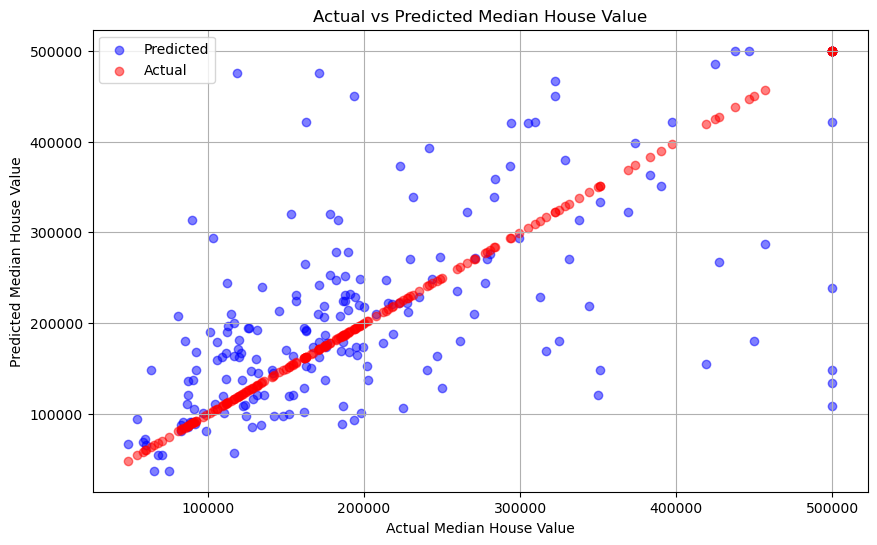

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted')
plt.scatter(y_test, y_test, color='red', alpha=0.5, label='Actual')
plt.title('Actual vs Predicted Median House Value')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.legend()
plt.grid(True)
plt.show()

##### Support Vector Regression (SVR)

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the SVR model
svr_model = SVR(kernel='rbf')

# Training the SVR model
svr_model.fit(X_train_scaled, y_train)

# Making predictions
svr_predictions = svr_model.predict(X_test_scaled)

# Calculating mean squared error
svr_mse = mean_squared_error(y_test, svr_predictions)

# Calculating root mean squared error
svr_rmse = np.sqrt(svr_mse)
print("Root Mean Squared Error (SVR):", svr_rmse)
print("\n")

# SVR with Cross Validation
svr_scores = cross_val_score(svr_model, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=10)
svr_scores_rmse = np.sqrt(-svr_scores)


Root Mean Squared Error (SVR): 113972.0523537356




In [ ]:
# Displaying scores
print("Cross Validation Scores (SVR):")
print(svr_scores_rmse)
print("Mean:", svr_scores_rmse.mean())
print("Standard deviation:", svr_scores_rmse.std())


Cross Validation Scores (SVR):
[100037.72570121 100609.78387774 121593.55279511 114147.46495456
 102359.92741236 137422.08696636 114776.32171745  83430.37506703
  98511.37618129 126619.20615962]
Mean: 109950.78208327324
Standard deviation: 15120.506101127108


In [ ]:
# Rounding the predicted prices to two decimal places
rounded_svr_predictions = [round(price, 2) for price in svr_predictions]

# Creating a DataFrame with actual and rounded predicted prices
svr_predicted_prices_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': rounded_svr_predictions})

# Displaying the DataFrame
print("SVR Predicted Prices:")
print(svr_predicted_prices_df)


SVR Predicted Prices:
     Actual Price  Predicted Price
696        154400        186186.19
667        195100        186206.02
63         161700        186178.20
533        500001        186215.46
66         305100        186198.92
..            ...              ...
90         121600        186173.28
650        134900        186178.37
181        280800        186216.74
790        331000        186204.32
554        184600        186197.28

[200 rows x 2 columns]


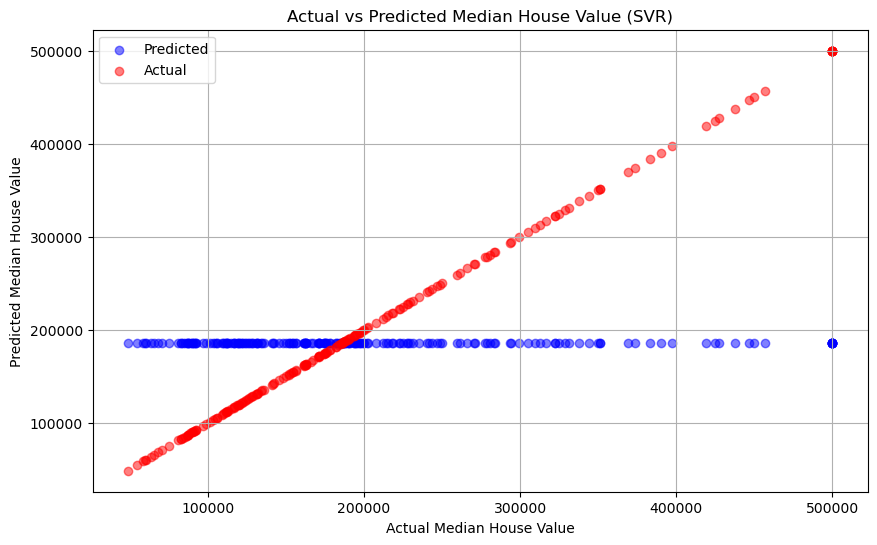

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svr_predictions, color='blue', alpha=0.5, label='Predicted')
plt.scatter(y_test, y_test, color='red', alpha=0.5, label='Actual')
plt.title('Actual vs Predicted Median House Value (SVR)')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.legend()
plt.grid(True)
plt.show()


###### Titanic dataset

In [ ]:
# Load the Titanic dataset
titanic_data = pd.read_csv("C:\\Users\\NAOMI NADDYB\\Desktop\\DATA\\Titanic_coursework_entire_dataset_23-24.csv")

# Display the first few rows of the dataset
print(titanic_data.head())




   PassengerId  Pclass                                               Name  \
0            1     3.0                            Braund, Mr. Owen Harris   
1            2     1.0  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3     3.0                             Heikkinen, Miss. Laina   
3            4     1.0       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5     3.0                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Embarked  Survival  
0    male  22.0      1      0         A/5 21171   7.2500        S         0  
1  female  38.0      1      0          PC 17599  71.2833        C         1  
2  female  26.0      0      0  STON/O2. 3101282   7.9250        S         1  
3  female  35.0      1      0            113803  53.1000        S         1  
4    male  35.0      0      0            373450   8.0500        S         0  


In [ ]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x += 1
            df[column] = list(map(convert_to_int, df[column]))
    return df


In [ ]:
# Convert non-numerical data to numerical
titanic_data = handle_non_numerical_data(titanic_data)

# Display the first few rows of the dataset
print(titanic_data.head())

   PassengerId  Pclass  Name  Sex   Age  SibSp  Parch  Ticket     Fare  \
0            1     3.0   501    1  22.0      1      0     355   7.2500   
1            2     1.0   884    0  38.0      1      0      20  71.2833   
2            3     3.0   458    0  26.0      0      0     464   7.9250   
3            4     1.0   793    0  35.0      1      0     358  53.1000   
4            5     3.0   326    1  35.0      0      0     426   8.0500   

   Embarked  Survival  
0         0         0  
1         1         1  
2         0         1  
3         0         1  
4         0         0  


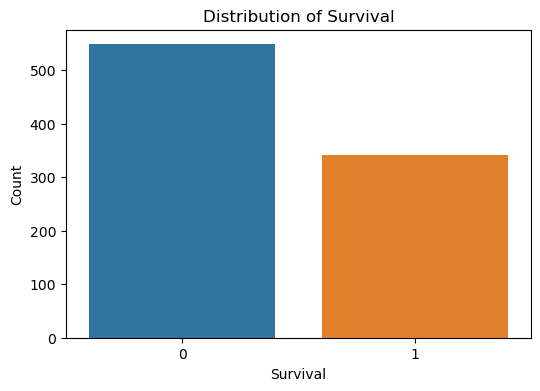

In [ ]:
# Distribution of Survival
plt.figure(figsize=(6, 4))
sns.countplot(x='Survival', data=titanic_data)
plt.title('Distribution of Survival')
plt.xlabel('Survival')
plt.ylabel('Count')
plt.show()

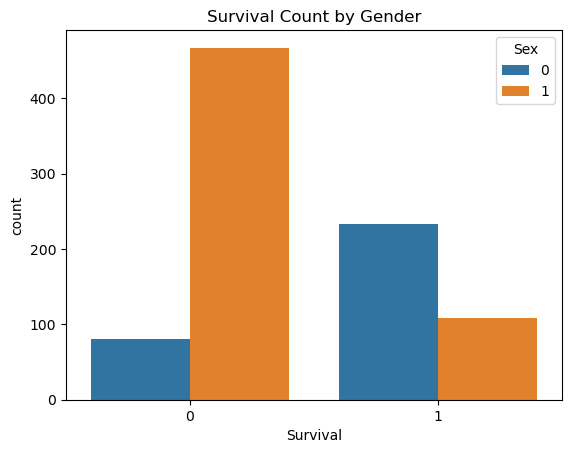

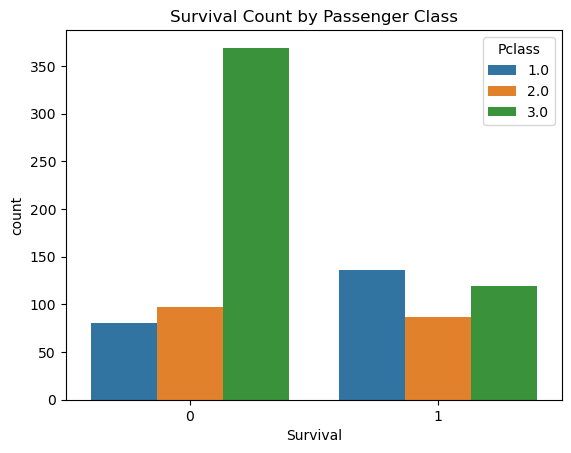

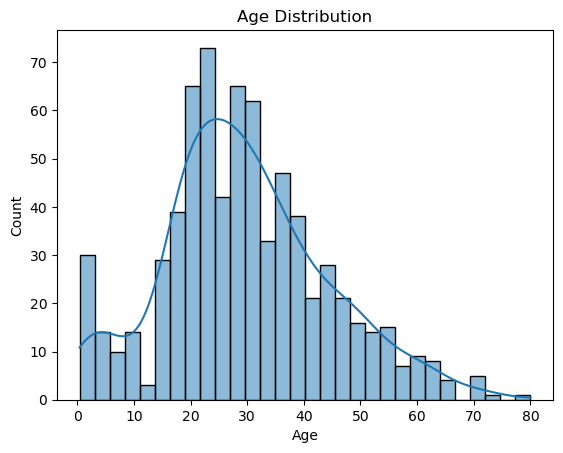

In [ ]:
# Data visualization

sns.countplot(x='Survival', hue='Sex', data=titanic_data)
plt.title('Survival Count by Gender')
plt.show()

sns.countplot(x='Survival', hue='Pclass', data=titanic_data)
plt.title('Survival Count by Passenger Class')
plt.show()

sns.histplot(data=titanic_data, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

In [ ]:
y_target = titanic_data['Survival']
x_train = titanic_data[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare','Embarked', 'Ticket']]

x_train = handle_non_numerical_data(x_train)
x_train.head()



,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked,Ticket
0,3.0,22.0,1,1,0,7.2500,0,355
1,1.0,38.0,0,1,0,71.2833,1,20
2,3.0,26.0,0,0,0,7.9250,0,464
3,1.0,35.0,0,1,0,53.1000,0,358
4,3.0,35.0,1,0,0,8.0500,0,426


In [ ]:
x_train.isnull().sum()


Pclass        2
Age         176
Sex           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Ticket        0
dtype: int64

In [ ]:
# Handling missing values
x_train['Pclass'] = x_train['Pclass'].fillna(x_train['Pclass'].median())
x_train['Age'] = x_train['Age'].fillna(x_train['Age'].median())
print("Number of NULL values" , x_train['Age'].isnull().sum())
print(x_train.head(3))

Number of NULL values 0
   Pclass   Age  Sex  SibSp  Parch     Fare  Embarked  Ticket
0     3.0  22.0    1      1      0   7.2500         0     355
1     1.0  38.0    0      1      0  71.2833         1      20
2     3.0  26.0    0      0      0   7.9250         0     464


#### Create and train the SVM model

In [ ]:

svm_model = SVC(kernel='linear')
svm_model.fit(x_train[:650], y_target[:650])

# Make predictions
y_pred = svm_model.predict(x_train[650:])

# Evaluate model accuracy
accuracy = accuracy_score(y_target[650:], y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.7875


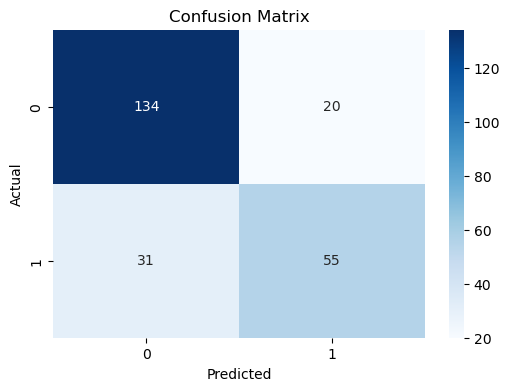

In [ ]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_target[650:], y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Create and train the KNN model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


# Define the parameter grid for KNN
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}

# Create and train KNN model with grid search
knn_model = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_model.fit(x_train[:650], y_target[:650])

# Get the best parameter
best_k = knn_model.best_params_['n_neighbors']

# Make predictions
y_pred_knn = knn_model.predict(x_train[650:])

# Evaluate model accuracy
accuracy_knn = accuracy_score(y_target[650:], y_pred_knn)
print("KNN Model Accuracy:", accuracy_knn)
print("Best value of K:", best_k)




KNN Model Accuracy: 0.6708333333333333
Best value of K: 15


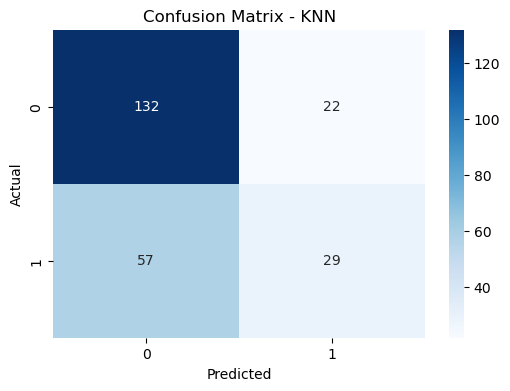

In [ ]:
# Computing confusion matrix for KNN Model
conf_matrix_knn = confusion_matrix(y_target[650:], y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##### The KNN model achieved an accuracy of approximately 73.33%, and the best value of K found through grid search cross-validation is 7.

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel

# parameter grid for Logistic Regression
param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Regularization type
}

# Creating and train Logistic Regression model with grid search
logistic_model = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42),
                              param_grid_logistic, cv=5)
logistic_model.fit(x_train[:650], y_target[:650])

# Get the best parameters
best_params_logistic = logistic_model.best_params_

# Make predictions
y_pred_logistic = logistic_model.predict(x_train[650:])

# Evaluate model accuracy
accuracy_logistic = accuracy_score(y_target[650:], y_pred_logistic)
print("Logistic Regression Model Accuracy:", accuracy_logistic)




Logistic Regression Model Accuracy: 0.8208333333333333


In [ ]:
# Print best parameters
print("Best Parameters:", best_params_logistic)


# Feature selection
feature_selection = SelectFromModel(logistic_model.best_estimator_, threshold='median')
feature_selection.fit(x_train[:650], y_target[:650])
selected_features = x_train.columns[feature_selection.get_support()]
print("Selected Features:", selected_features)

Best Parameters: {'C': 1, 'penalty': 'l2'}
Selected Features: Index(['Pclass', 'Sex', 'SibSp', 'Embarked'], dtype='object')


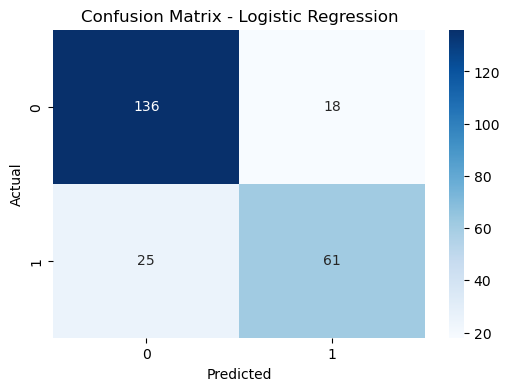

In [ ]:
# Plot confusion matrix
conf_matrix_logistic = confusion_matrix(y_target[650:], y_pred_logistic)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_logistic, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()